In [23]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Read Data
data = pd.read_csv("/Users/Syafiq/Downloads/housing_dataset.csv")
data

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


In [138]:
# No empty data to clean (data cleaning)
print(data.isnull().sum())

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64


<Axes: >

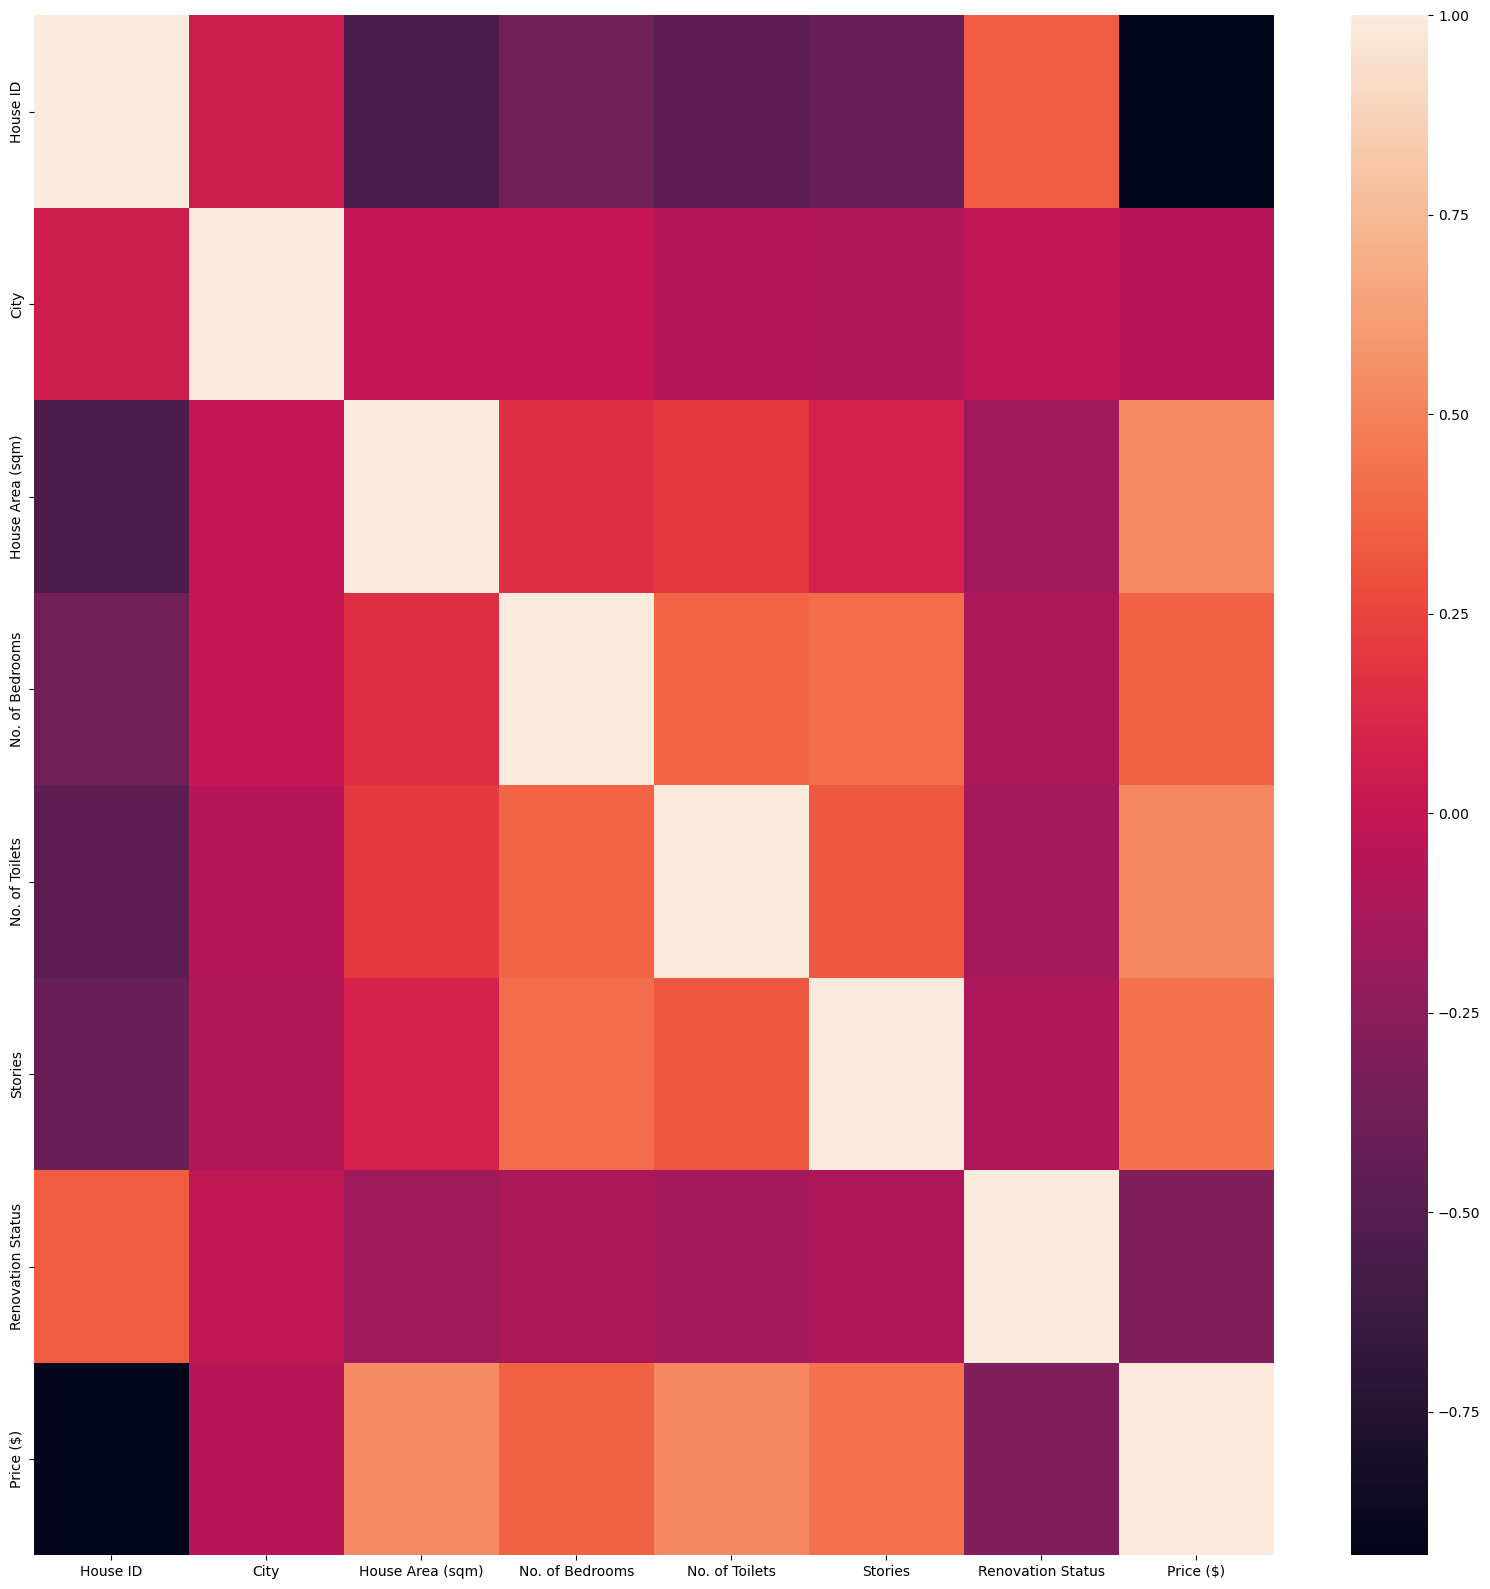

In [4]:
# Heat Map for data exploration
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [24]:
# LabelEncoder to convert categorical text data 
# I represent my data as features by dropping irrelevant collums
# converting with labelencoder
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Renovation Status'] = label_encoder.fit_transform(data['Renovation Status'])

X = data.drop('House ID',axis=1)
X = X.drop('Price ($)',axis=1)
y = data['Price ($)']

X


,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,1,742.0,4,2,3,0
1,2,896.0,4,4,4,0
2,1,996.0,3,2,2,1
3,4,750.0,4,2,2,0
4,3,742.0,4,1,2,0
...,...,...,...,...,...,...
540,4,300.0,2,1,1,2
541,3,240.0,3,1,1,1
542,0,362.0,2,1,1,2
543,4,291.0,3,1,1,0


<Axes: >

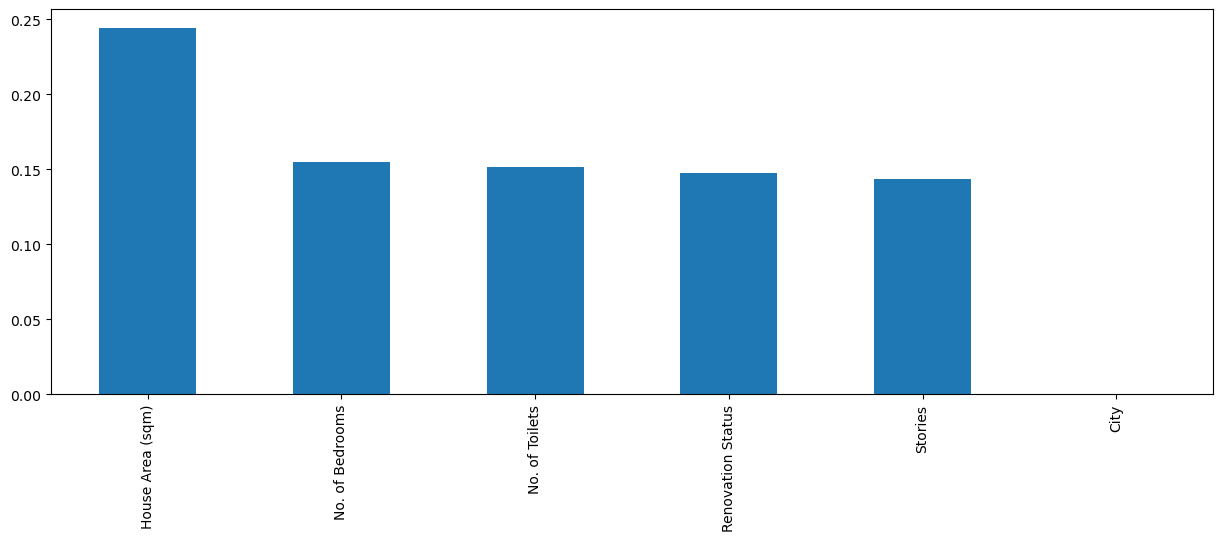

In [25]:
# Feature Selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.2,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [125]:
X1 = X.iloc[:, np.argsort(mutual_info)[1:]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [127]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Calculate different values for different values
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet()
    
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    evs = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print("Model:", name)
    print("Explained Variance Score:", evs)
    print("R^2 Score:", r2)
    print("RMSE:", rmse)
    print()


Model: OLS
Explained Variance Score: 0.6066164077985713
R^2 Score: 0.6033888970799548
RMSE: 117292.56134709014

Model: Ridge
Explained Variance Score: 0.6070658475907191
R^2 Score: 0.6038588729409242
RMSE: 117223.04613158412

Model: Lasso
Explained Variance Score: 0.6066188817990077
R^2 Score: 0.6033914430389096
RMSE: 117292.18487940691

Model: Elastic Net
Explained Variance Score: 0.6019069211093002
R^2 Score: 0.6003596547268835
RMSE: 117739.63875753866



In [130]:
# Calculate kfold for different models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),

}

kf = KFold(n_splits=6, shuffle=True, random_state=5)

for name, model in models.items():
    cv_scores = cross_val_score(model, X1, y, cv=kf)
    avg_score = np.mean(cv_scores)
    print("Model:", name)
    print("Average Score:", avg_score)
    print()


Model: Linear Regression
Average Score: 0.5370352468931054

Model: Ridge
Average Score: 0.5370992360367001

Model: Lasso
Average Score: 0.5370353730879994



In [ ]:
# Select ridge learning algorithm because of the values of
# kfold, r2, rmse and explain variance score

In [ ]:
# How i tune hyperparameters of learning algorithm
# I tuned it by finding an alpha value that gives me the best score using ridge regression
# I tuned it by finding the best parameters to give me the best score using gridsearchcv

In [131]:
# Regularization regression: Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  
  ridge = Ridge(alpha=alpha)
  
  # Fit data
  ridge.fit(X_train_scaled, y_train)
  
  # Obtain R2
  score = ridge.score(X_test_scaled, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.603436511241811, 0.6038588729409242, 0.6075064918206955, 0.6084826110034648, 0.346323522411217, 0.05704215354487596]


In [132]:

# Define the Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid
# Alpha 100 (from previous line)
param_grid = {
    'alpha': [100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': ['none',100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5],
    'copy_X': [True,False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Ridge model with the best hyperparameters
best_ridge = Ridge(**best_params)

# Fit the new Ridge model to the training data
best_ridge.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_ridge.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(r2)
print(best_params)

0.6084331747638472
{'alpha': 100, 'copy_X': False, 'fit_intercept': True, 'max_iter': 500, 'solver': 'saga', 'tol': 0.001}


D:\ana\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ana\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ana\lib\site-packages\sklearn\linear_model\_ridge.py", line 1123, in fit
    self._validate_params()
  File "D:\ana\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "D:\ana\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints


In [133]:
# Calculate R2, MSE and RMSE score for baseline model and tuned model and make a comparison
ridge= Ridge()


ridge.fit(X_train_scaled, y_train)


y_pred = ridge.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Baseline Model')
print("R-squared Score:", r2)
print("MSE Score:", mse)
print("RMSE Score:", rmse)
print('')
ridge_t= Ridge(alpha=100,copy_X=False, fit_intercept= True, max_iter= 100, solver='sag', tol= 0.001)

ridge_t.fit(X_train_scaled, y_train)


y_pred_t = ridge_t.predict(X_test_scaled)


r2_t = r2_score(y_test, y_pred_t)
mse_t = mean_squared_error(y_test, y_pred_t)
rmse_t = mean_squared_error(y_test, y_pred_t, squared=False)
print("Tuned model")
print("R-squared Score:", r2_t)
print("MSE Score:", mse_t)
print("RMSE Score:", rmse_t)
print("")

print("Difference in value")
print("R-squared Score:", r2_t-r2)
print("MSE Score:", mse- mse_t)
print("RMSE Score:",rmse- rmse_t)

# This is how i can evaluate the quality of my system

Baseline Model
R-squared Score: 0.6038588729409242
MSE Score: 13741242544.367502
RMSE Score: 117223.04613158414

Tuned model
R-squared Score: 0.6084780475234564
MSE Score: 13581013792.648205
RMSE Score: 116537.6067741577

Difference in value
R-squared Score: 0.004619174582532137
MSE Score: 160228751.7192974
RMSE Score: 685.4393574264395


In [137]:
#Print predictions and actual values
y_pred = ridge.predict(X_test_scaled)
print("Predictions from baseline model:",y_pred[:2])
print("Predictions from tuned model:",y_pred_t[:2])
print("Actual:",y_test[:2])

# An example of my prediction task
# My predictions and the actual values were quite close
# $2500 and $20000 difference
# And baseline model values were further
# Thus, i think my model did a decent job in predicting 

Predictions from baseline model: [450370.61408195 614993.14833593]
Predictions from tuned model: [461060.39690478 582598.71573984]
Actual: 239    458500
113    608300
Name: Price ($), dtype: int64


In [136]:
# Train and test R2 value
y_train_pred = ridge_t.predict(X_train_scaled)

r2_train = r2_score(y_train, y_train_pred)

y_test_pred = ridge_t.predict(X_test_scaled)

r2_test = r2_score(y_test, y_test_pred)

print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Train): 0.5235878473704334
R-squared (Test): 0.6084780475234564
